### **Content-based Course Recommender System using Course Similarities**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.spatial.distance import cosine

%matplotlib inline

In [2]:
course_df = pd.read_csv('course_processed.csv')
course_df

,COURSE_ID,TITLE,DESCRIPTION
0,ML0201EN,Robots Are Coming Build Iot Apps With Watson ...,Have Fun With Iot And Learn Along The Way If ...
1,ML0122EN,Accelerating Deep Learning With Gpu,Training Complex Deep Learning Models With Lar...
2,GPXX0ZG0EN,Consuming Restful Services Using The Reactive ...,Learn How To Use A Reactive Jax Rs Client To A...
3,RP0105EN,Analyzing Big Data In R Using Apache Spark,Apache Spark Is A Popular Cluster Computing Fr...
4,GPXX0Z2PEN,Containerizing Packaging And Running A Sprin...,Learn How To Containerize Package And Run A ...
...,...,...,...
302,excourse89,Javascript Jquery And Json,In This Course We Ll Look At The Javascript L...
303,excourse90,Programming Foundations With Javascript Html ...,Learn Foundational Programming Concepts E G ...
304,excourse91,Front End Web Development With React,This Course Explores Javascript Based Front En...
305,excourse92,Introduction To Web Development,This Course Is Designed To Start You On A Path...


In [3]:
bows_df = pd.read_csv('courses_bows.csv')
bows_df = bows_df[['doc_id', 'token', 'bow']]
bows_df.head()

,doc_id,token,bow
0,ML0201EN,Ai,2
1,ML0201EN,Along,1
2,ML0201EN,Apps,2
3,ML0201EN,Build,2
4,ML0201EN,Cloud,1


In [4]:
def pivot_two_bows(basedoc, comparedoc):
    base = basedoc.copy()
    base['type'] = 'base'
    compare = comparedoc.copy()
    compare['type'] = 'compare'
    join = pd.concat([base, compare])
    joinT = join.pivot(index=['doc_id', 'type'], columns='token').fillna(0).reset_index(level=[0, 1])
    joinT.columns = ['doc_id', 'type'] + [t[1] for t in joinT.columns][2:]
    return joinT

similarity_matrix = pd.DataFrame(
    data=np.nan, 
    index=list(range(course_df.shape[0])),
    columns=list(range(course_df.shape[0]))
)

bow_dict = {doc_id: group for doc_id, group in bows_df.groupby('doc_id')}

def similarity_bw_courses(course_id_1, course_id_2):

    course1 = bow_dict[course_id_1]
    course2 = bow_dict[course_id_2]
    bow_vectors = pivot_two_bows(course1, course2)
    similarity = 1 - cosine(bow_vectors.iloc[0, 2:], bow_vectors.iloc[1, 2:])
    
    return similarity

course_ids = course_df['COURSE_ID'].tolist()

for i in range(len(course_ids)):
    for j in range(i, len(course_ids)):
        sim = similarity_bw_courses(course_ids[i], course_ids[j])
        similarity_matrix.iloc[i, j] = sim
        similarity_matrix.iloc[j, i] = sim 

similarity_matrix

,0,1,2,3,4,5,6,7,8,9,...,297,298,299,300,301,302,303,304,305,306
0,1.000000,0.094649,0.084103,0.063420,0.047219,0.101274,0.063078,0.138675,0.000000,0.023610,...,0.012105,0.066617,0.055629,0.043403,0.024279,0.031955,0.073736,0.069982,0.036775,0.115642
1,0.094649,1.000000,0.062090,0.054624,0.011620,0.074767,0.031045,0.136505,0.042126,0.000000,...,0.175748,0.123863,0.082138,0.089008,0.017924,0.026212,0.064517,0.151551,0.028959,0.072439
2,0.084103,0.062090,1.000000,0.026003,0.038720,0.000000,0.000000,0.151620,0.000000,0.000000,...,0.039703,0.036418,0.013033,0.035591,0.000000,0.017469,0.080619,0.130075,0.012062,0.000000
3,0.063420,0.054624,0.026003,1.000000,0.000000,0.250490,0.390038,0.000000,0.000000,0.000000,...,0.149696,0.411926,0.422606,0.053676,0.000000,0.092209,0.030396,0.017309,0.018192,0.156015
4,0.047219,0.011620,0.038720,0.000000,1.000000,0.000000,0.000000,0.085126,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.093250,0.000000,0.078462,0.030175,0.128875,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,0.031955,0.026212,0.017469,0.092209,0.078462,0.063105,0.052406,0.038405,0.035556,0.058846,...,0.050284,0.110694,0.132051,0.210352,0.242054,1.000000,0.211011,0.178304,0.122213,0.253297
303,0.073736,0.064517,0.080619,0.030396,0.030175,0.000000,0.000000,0.118159,0.054697,0.045263,...,0.174045,0.089873,0.147276,0.503880,0.240484,0.211011,1.000000,0.238515,0.399510,0.174674
304,0.069982,0.151551,0.130075,0.017309,0.128875,0.009214,0.000000,0.252324,0.093443,0.025775,...,0.151970,0.105051,0.135923,0.268509,0.132527,0.178304,0.238515,1.000000,0.214120,0.126249
305,0.036775,0.028959,0.012062,0.018192,0.000000,0.014525,0.024124,0.079556,0.073654,0.081267,...,0.152772,0.097667,0.164127,0.452344,0.229816,0.122213,0.399510,0.214120,1.000000,0.120622


<Axes: >

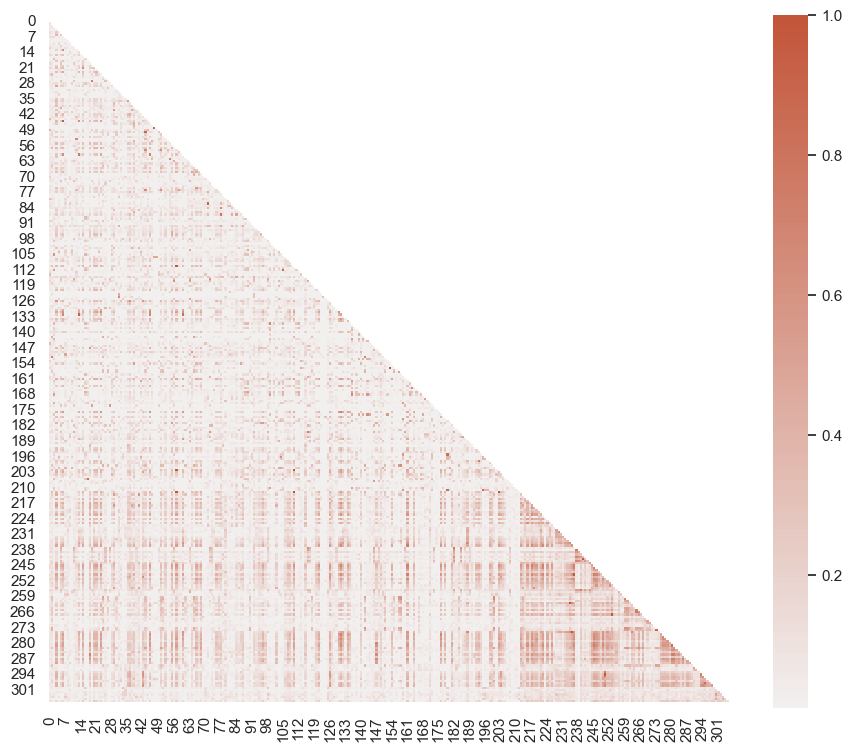

In [5]:
sns.set_theme(style="white")
mask = np.triu(np.ones_like(similarity_matrix, dtype=bool))
_, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Plot a similarity heat map
sns.heatmap(similarity_matrix, mask=mask, cmap=cmap, vmin=0.01, vmax=1, center=0,square=True)

From the heatmap we can say that there are many hot spots, which means many courses are similar to each other. Such patterns suggest that it is possible to build a recommender system based on course similarities.

In [6]:
def get_doc_dicts(bow_df):
    grouped_df = bow_df.groupby(['doc_index', 'doc_id']).max().reset_index(drop=False)
    idx_id_dict = grouped_df[['doc_id']].to_dict()['doc_id']
    id_idx_dict = {v: k for k, v in idx_id_dict.items()}
    del grouped_df
    return idx_id_dict, id_idx_dict

In [7]:
course_ids = course_df['COURSE_ID'].tolist()
idx_id_dict = {}
id_idx_dict = {}

for i in range(len(course_ids)):
    idx_id_dict[i] = course_ids[i]
    id_idx_dict[course_ids[i]] = i

In [8]:
sim_matrix = similarity_matrix.to_numpy()
sim_matrix

array([[1.        , 0.094649  , 0.08410343, ..., 0.06998199, 0.03677465,
        0.11564221],
       [0.094649  , 1.        , 0.06209038, ..., 0.15155084, 0.02895929,
        0.07243878],
       [0.08410343, 0.06209038, 1.        , ..., 0.13007453, 0.01206221,
        0.        ],
       ...,
       [0.06998199, 0.15155084, 0.13007453, ..., 1.        , 0.21412046,
        0.12624881],
       [0.03677465, 0.02895929, 0.01206221, ..., 0.21412046, 1.        ,
        0.12062208],
       [0.11564221, 0.07243878, 0.        , ..., 0.12624881, 0.12062208,
        1.        ]])

#### **Let's find courses which are similar enough to your enrolled courses.**

In [9]:
enrolled_course_ids = course_df['COURSE_ID'].sample(10)
enrolled_course_ids

252    excourse39
25       CC0210EN
226    excourse13
276    excourse63
191      DB0101EN
247    excourse34
61       ML0111EN
54     GPXX04HEEN
59       TA0106EN
189      CC0201EN
Name: COURSE_ID, dtype: object

In [10]:
enrolled_courses = course_df[course_df['COURSE_ID'].isin(enrolled_course_ids)]
enrolled_courses

,COURSE_ID,TITLE,DESCRIPTION
25,CC0210EN,Serverless Computing Using Cloud Functions D...,This Course Is Designed To Teach You Serverles...
54,GPXX04HEEN,Insurance Business Modelling And Basic Actuari...,In This Guided Project You Will Learn How To B...
59,TA0106EN,Text Analytics At Scale,A Continuation Of Text Analytics Getting Resul...
61,ML0111EN,Machine Learning With Apache Systemml,Apache Systemml Is A Declarative Style Languag...
189,CC0201EN,Introduction To Containers Kubernetes And Op...,This Course Introduces The Core Concepts Of Co...
191,DB0101EN,Sql And Relational Databases 101,Are You Ready To Dive Into The World Of Sql An...
226,excourse13,Relational Database Support For Data Warehouses,Relational Database Support For Data Warehouse...
247,excourse34,Introduction To Data Analysis,With This Course You Will Begin To Take The F...
252,excourse39,Excel Fundamentals For Data Analysis,As Data Becomes The Modern Currency So The Ab...
276,excourse63,A Crash Course In Data Science,By Now You Have Definitely Heard About Data Sc...


In [11]:
all_courses = set(course_df['COURSE_ID'])

unselected_course_ids = all_courses.difference(enrolled_course_ids)
unselected_course_ids

{'AI0111EN',
 'BC0101EN',
 'BC0201EN',
 'BC0202EN',
 'BD0101EN',
 'BD0111EN',
 'BD0115EN',
 'BD0121EN',
 'BD0123EN',
 'BD0131EN',
 'BD0133EN',
 'BD0135EN',
 'BD0137EN',
 'BD0141EN',
 'BD0143EN',
 'BD0145EN',
 'BD0151EN',
 'BD0153EN',
 'BD0211EN',
 'BD0212EN',
 'BD0221EN',
 'BD0223EN',
 'BENTEST4',
 'CB0101EN',
 'CB0103EN',
 'CB0105ENv1',
 'CB0201EN',
 'CC0101EN',
 'CC0103EN',
 'CC0120EN',
 'CC0121EN',
 'CC0150EN',
 'CC0250EN',
 'CC0271EN',
 'CL0101EN',
 'CNSC02EN',
 'CO0101EN',
 'CO0193EN',
 'CO0201EN',
 'CO0301EN',
 'CO0302EN',
 'CO0401EN',
 'COM001EN',
 'CP0101EN',
 'DA0101EN',
 'DA0151EN',
 'DA0201EN',
 'DAI101EN',
 'DB0111EN',
 'DB0113EN',
 'DB0115EN',
 'DB0151EN',
 'DE0205EN',
 'DJ0101EN',
 'DP0101EN',
 'DS0101EN',
 'DS0103EN',
 'DS0105EN',
 'DS0107',
 'DS0110EN',
 'DS0132EN',
 'DS0201EN',
 'DS0301EN',
 'DS0321EN',
 'DV0101EN',
 'DV0151EN',
 'DW0101EN',
 'DX0106EN',
 'DX0107EN',
 'DX0108EN',
 'EE0101EN',
 'GPXX01AVEN',
 'GPXX01DCEN',
 'GPXX01RYEN',
 'GPXX03HFEN',
 'GPXX0435EN',
 '

In [12]:
def generate_recommendations_for_one_user(enrolled_course_ids, threshold):

    all_courses = set(course_df['COURSE_ID'])
    unselected_course_ids = all_courses.difference(enrolled_course_ids)
    
    res = {}
    for enrolled_course in enrolled_course_ids:
        for unselect_course in unselected_course_ids:
            if enrolled_course in id_idx_dict and unselect_course in id_idx_dict:

                sim = 0
                idx1 = id_idx_dict[enrolled_course]
                idx2 = id_idx_dict[unselect_course]

                sim = sim_matrix[idx1][idx2]

                if sim > threshold:
                    if unselect_course not in res:
                        res[unselect_course] = sim
                    else:
                        if sim >= res[unselect_course]:
                            res[unselect_course] = sim

    recommended_cousres = pd.merge(pd.DataFrame({'COURSE_ID' : res.keys(), 'COS_SIM' : res.values()}), course_df, how = 'left', on = 'COURSE_ID')[['COURSE_ID', 'TITLE', 'COS_SIM']]

    return recommended_cousres.sort_values(by = 'COS_SIM', ascending=False)

In [13]:
generate_recommendations_for_one_user(enrolled_courses['COURSE_ID'], 0.6)

,COURSE_ID,TITLE,COS_SIM
3,DS0110EN,Data Science With Open Data,0.707396
6,DS0101EN,Introduction To Data Science,0.676971
5,excourse64,Data Science In Real Life,0.674475
0,GPXX048OEN,Action Classification Task Based On Internet F...,0.668153
4,excourse65,Data Science Fundamentals For Data Analysts,0.658304
1,excourse02,Business Intelligence And Data Warehousing,0.629995
2,excourse32,Introduction To Data Analytics,0.625205


#### **Generating course recommendations based on course similarities for all test uesrs**


In [14]:
test_users_df = pd.read_csv('ratings_test.csv')
test_users_df

,user,item,rating
0,1502801,RP0105EN,3.0
1,1609720,CNSC02EN,2.0
2,1347188,CO0301EN,3.0
3,755067,ML0103EN,3.0
4,538595,BD0115EN,3.0
...,...,...,...
9397,1385217,EE0101EN,3.0
9398,1864644,DA0101EN,3.0
9399,435858,TMP0105EN,3.0
9400,1888188,DB0101EN,3.0


In [15]:
test_users_df[test_users_df['user'] == 1502801]['item'].to_numpy()

array(['RP0105EN', 'BD0131EN', 'BD0212EN', 'BD0115EN', 'BD0211EN',
       'BD0221EN', 'BD0223EN', 'BD0141EN', 'BD0111EN', 'BD0101EN'],
      dtype=object)

In [16]:
generate_recommendations_for_all = pd.DataFrame(columns=['USER_ID',  'COURSE_ID', 'TITLE', 'COS_SIM'])

for user_id in test_users_df['user'].sort_values().unique():
    enrolled_course_ids = test_users_df[test_users_df['user'] == user_id]['item'].to_numpy()
    similarity = generate_recommendations_for_one_user(enrolled_course_ids, 0.6)
    similarity['USER_ID'] = user_id
    generate_recommendations_for_all = pd.concat([generate_recommendations_for_all, similarity], ignore_index=True)

generate_recommendations_for_all


C:\Users\Manoj\AppData\Local\Temp\ipykernel_5744\1387592456.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  generate_recommendations_for_all = pd.concat([generate_recommendations_for_all, similarity], ignore_index=True)


,USER_ID,COURSE_ID,TITLE,COS_SIM
0,37465,DS0110EN,Data Science With Open Data,0.726483
1,37465,excourse67,Introduction To Big Data,0.706403
2,37465,excourse63,A Crash Course In Data Science,0.676971
3,37465,excourse72,Foundations For Big Data Analysis With Sql,0.652535
4,37465,excourse74,Fundamentals Of Big Data,0.650071
...,...,...,...,...
10576,2087663,excourse65,Data Science Fundamentals For Data Analysts,0.627971
10577,2087663,excourse28,Fundamentals Of Cloud Computing,0.623754
10578,2087663,BD0145EN,Sql Access For Hadoop,0.622797
10579,2087663,excourse68,Big Data Modeling And Management Systems,0.616336
